<a href="https://colab.research.google.com/github/Followb1ind1y/D2L_Pytorch_Study_Notes/blob/main/03_D2L_Linear_Neural_Networks_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dive into Deep Learning 中文学习笔记**
# **3. 用于回归的线性神经网络（Linear Neural Networks for Regression）**

## **3.1. 线性回归 （Linear Regression）**

只要我们想预测一个数值，**回归（*Regression*）** 问题就会出现。常见的例子包括预测价格（房屋、股票等）、预测住院时间（医院里的病人）、预测需求（零售业），以及其他无数的例子。

假设我们希望根据房屋的面积（平方米）和房龄（年）来估计房屋的价格（元）。为了开发一个预测房价的模型，我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为**训练数据集（*training data set*）**或**训练集（*training set*）**，一栋房屋被称为一个**样本（*sample*）**，其真实售出价格叫作**标签（*label*）**，用来预测标签的两个因素叫作**特征（*feature*）**。特征用来表征样本的特点。

### **3.1.1. 基础知识（Basics）**

**线性回归（*Linear regression*）** 可能是处理回归问题的标准工具中最简单和最流行的一种。线性回归源于几个简单的假设。首先，我们假设**特征（*features*）** $\mathbf{x}$ 和**目标（*target*）** $y$ 之间的关系是近似线性的。即条件平均值 $E[Y \mid X=\mathbf{x}]$ 可以表示为特征 $\mathbf{x}$ 的加权和。这种设置允许目标值仍可能因观测噪声而偏离其预期值。接下来，我们可以强加一个假设，即任何这样的噪声都是行为良好的，遵循高斯分布。通常情况下，我们会用 $n$ 来表示数据集中的例子数量。我们用上标来列举样本和目标，用下标来索引坐标。更具体地说，$\mathbf{x}^{(i)}$ 表示第 $i$ 个样本，$x_j^{(i)}$ 表示其第 $j$ 个坐标。

**3.1.1.1. 模型（Model）**

每个解决方案的核心是一个**模型（*model*）**，描述如何将**特征转化为目标的估计值**。在房屋价格预测的例子中。目标是预测一栋房子的售出价格（元）。我们知道这个价格取决于很多因素，如房屋状况、地段、市场行情等。为了简单起见，这里我们假设价格只取决于房屋状况的两个因素，即面积（平方米）和房龄（年）。我们希望探索价格与这两个因素的具体关系。

在这个例子中，线性假设意味着目标的预期值（价格）可以表示为特征（面积和年龄）的加权和。

$$\hat{y} = w_{1}x_{1}+w_{2}x_{2}+b$$

其中 $w_{1}$ 和 $w_{2}$ 是**权重（*weight*）**，$b$ 是**偏差（*bias*）**，且均为标量。它们是线性回归模型的**参数（*parameter*）**。模型输出 $\hat{y}$ 是线性回归对真实价格 $y$ 的预测或估计。我们通常允许它们之间有一定误差。

在机器学习中，我们通常与高维数据集打交道，这时采用紧凑的线性代数符号更为方便。当我们的输入由 $d$ 个特征组成时，我们可以给每个特征分配一个索引（在1和 $d$ 之间），并将我们的预测 $\hat{y}$（一般来说，$̂$ 符号表示一个估计值）表示为

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$

将所有的特征收集成一个向量 $\mathbf{x} \in \mathbb{R}^d$，将所有的权重收集成一个向量 $\mathbf{w} \in \mathbb{R}^d$，我们可以通过 $\mathbf{w}$ 和 $\mathbf{b}$ 的点乘来紧凑地表达我们的模型。

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

**3.1.1.2. 损失函数（Loss Function）**

在模型训练中，我们需要**衡量价格预测值与真实值之间的误差**。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

其中常数 $\frac{1}{2}$ 使对平方项求导后的常数系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为0。在机器学习里，将衡量误差的函数称为**损失函数（*loss function*）**。这里使用的平方误差函数也称为**平方损失（*square loss*）**。

<center><img src="https://drive.google.com/uc?export=view&id=1hi0Rrj7MtFtUfr-F4VQyvH5XK03O-7Xa" width=350px /></center>

通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在模型训练中，我们希望找出一组模型参数，记为 $(\mathbf{w}^{*},b^{*})$，来使训练样本平均损失最小：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

**3.1.1.4. 小批量随机梯度下降（Minibatch Stochastic Gradient Descent）**

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作**解析解（*analytical solution*）**。然而，大多数深度学习模型并没有解析解，只能通过**优化算法**有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作**数值解（*numerical solution*）**。

**优化（*optimization*）**是几乎所有深度学习模型的关键技术，包括通过更新参数，逐步降低损失函数的方向来迭代减少误差。这种算法被称为**梯度下降法（*gradient descent*）**。

在求数值解的优化算法中，**小批量随机梯度下降（*mini-batch stochastic gradient descent*）**在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的**小批量（*mini-batch*）**$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。我们可以将每次迭代表达如下，

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

$$\begin{aligned} \mathbf{w} & \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \partial_b l^{(i)}(\mathbf{w}, b) &&  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}_t} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$

其中，$|\mathcal{B}|$ 代表每个小批量中的样本个数（**批量大小，*batch size***），$\eta$ 称作**学习率（*learning rate*）**并取正数。需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出的，因此叫作**超参数（*hyperparameter*）**。

**3.1.1.5. 预测（Predictions）**

模型训练完成后，我们将模型参数 $(\mathbf{w}, b)$ 在优化算法停止时的值分别记作 $(\hat{\mathbf{w}},\hat{b})$。注意，这里我们得到的并不一定是最小化损失函数的最优解 $(\mathbf{w}^{*}, b^{*})$，而是对最优解的一个近似。然后，我们就可以使用训练出的线性回归模型 $\hat{\mathbf{w}}^\top \mathbf{x} + \hat{b}$ 来对一个新的例子进行**预测（*prediction*）**。

###**3.1.2. 矢量化提速（Vectorization for Speed）**

在训练我们的模型时，我们通常希望同时处理整个迷你批次的例子。为了有效地做到这一点，我们需要将计算**矢量化**，并利用快速的线性代数库，而不是在Python中编写昂贵的for-loops。首先定义两个1000维的向量。

In [12]:
import torch
import time

In [13]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

向量相加的一种方法是，将这两个向量按元素逐一做标量加法。

In [14]:
c = torch.zeros(n)
t = time.time()
for i in range(n):
    c[i] = a[i] + b[i]
f'{time.time() - t:.5f} sec'

'0.13099 sec'

向量相加的另一种方法是，将这两个向量直接做矢量加法。

In [15]:
t = time.time()
d = a + b
f'{time.time() - t:.5f} sec'

'0.00072 sec'

结果很明显，后者比前者更省时。因此，我们应该尽可能采用矢量计算，以提升计算效率。

### **3.1.4. 线性回归的神经网络表示方法（Linear Regression as a Neural Network）**

在深度学习中，我们可以使用神经网络图直观地表现模型结构。下图描述了作为神经网络的线性回归。该图强调了连接模式，如每个输入是如何连接到输出的，但没有强调权重或偏差所采取的具体数值。

<center><img src="https://drive.google.com/uc?export=view&id=1fLcisypwgLnu49AG7z3c8IVWJZ3HdYSL" width=450px /></center>

在该神经网络中，输入为 $x_{1},x_{2}, ⋯ x_{d}$，输入层的输入个数为 $d$。输入个数也叫**特征数**或**特征向量维度**。网络的输出为 $o_{1}$，输出层的输出个数为1。需要注意的是，我们直接将图中神经网络的输出$o_{1}$作为线性回归的输出，即 $\hat{y}=o_{1}$。由于输入层并不涉及计算，上图的神经网络的层数为1。所以，线性回归是一个单层神经网络。输出层中负责计算 $o$ 的单元又叫**神经元**。在线性回归中，$o$ 的计算依赖于 $x_{1},x_{2}, ⋯ x_{d}$。也就是说，输出层中的神经元和输入层中各个输入完全连接。因此，这里的输出层又叫**全连接层（*fully-connected layer*）**或**稠密层（*dense layer*）**。


## **3.2. 面向对象设计的实施（Object-Oriented Design for Implementation）**

在高层次上，我们希望有三个类: **(i)** `Module` **包含模型、损失和优化方法**；**(ii)** `DataModule` **提供用于训练和验证的数据加载器**；**(iii)** 这两个类使用 `Trainer` 类进行组合，它允许我们**在各种硬件平台上训练模型**。

In [16]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### **3.2.1. 实用工具（Utilities）**

我们需要一些实用工具来简化 Jupyter 笔记本中的面向对象编程。其中一个挑战是，类的定义往往是相当长的代码块。笔记本的可读性需要简短的代码片段，并穿插一些解释，这一要求与 Python 库常见的编程风格不相容。第一个实用函数允许我们在类创建后将函数注册为类中的方法。**它允许我们将一个类的实现分成多个代码块**。

In [17]:
def add_to_class(Class):
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

我们计划 implement a class `A` with a method `do`。我们可以先 declare the class `A` 并创建一个 instance `a`，而不是在同一个代码块中同时为 `A` 和 `do` 编写代码。

In [18]:
class A:
    def __init__(self):
        self.b = 1

a = A()

接下来，我们像平常一样定义这个方法，但不是在 class `A` 的范围内。相反，我们用 `add_to_class` 来装饰这个方法，把 class `A` 作为它的参数。这样一来，这个方法就能够访问 `A` 的成员变量。

In [19]:
@add_to_class(A)
def do(self):
    print('Class attribute "b" is', self.b)

a.do()

Class attribute "b" is 1


第二个是一个实用类，它将一个类的 `__init__` 方法中的**所有参数保存为类属性**。这使得我们可以隐式地扩展构造函数的调用签名，而无需额外的代码。

In [20]:
class HyperParameters:
    def save_hyperparameters(self, ignore=[]):
        raise NotImplemented

为了使用它，我们定义我们的类，它继承自 `HyperParameters`，并在 `__init__` 方法中调用 `save_hyperparameters`。

In [21]:
# Call the fully implemented HyperParameters class saved in d2l
class B(d2l.HyperParameters):
    def __init__(self, a, b, c):
        self.save_hyperparameters(ignore=['c'])
        print('self.a =', self.a, 'self.b =', self.b)
        print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

self.a = 1 self.b = 2
There is no self.c = True


最后一个工具允许我们在实验进行中交互式地绘制实验进展。

In [22]:
class ProgressBoard(d2l.HyperParameters):
    """Plot data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

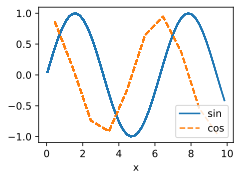

In [23]:
board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

### **3.2.2. 模型（Models）**

**模块类（*Module class*）**是我们要实现的所有模型的基类。我们至少需要定义三个 methods。`__init__` **存储 learnable parameters**，`training_step` 接受一个 **data batch** 以返回 **loss value**，`configure_optimizers` 方法返回 **optimization method**，用于更新可学习参数。我们可以选择性地定义 `validation_step` 来报告 **evaluation measures**。有时我们会把计算输出的代码放到一个 separate forward method 中，以使其更容易重复使用。

In [24]:
class Module(nn.Module, d2l.HyperParameters):
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters() # NotImplemented
        self.board = ProgressBoard() # NotImplemented
        
    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))
    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

### **3.2.3. 数据（Data）**

`DataModule` 类是数据的基类。很多时候，`__init__`方法被用来准备数据。这包括下载和预处理。`train_dataloader` 返回训练数据集的 data loader。**Data loader** 是一个（Python）生成器，每次使用时都会产生一个 data batch。这批数据然后被送入 Module 的 `training_step` 方法来计算 loss。有一个可选的 `val_dataloader` 来返回验证数据集 data loader。它的行为方式与此相同，只是它为 Module 中的 `validation_step` 方法产生数据批处理。

In [25]:
class DataModule(d2l.HyperParameters):
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

### **3.2.4. 训练（Training）**

`Trainer` 类用 `DataModule` 中指定的数据训练 Module 类中的可学习参数。关键方法是 `fit`，它接受两个参数：`model`，一个 `Module` 的实例，和 `data`，一个 `DataModule` 的实例。然后，它在整个数据集上迭代` max_epochs` 次数来训练模型。

In [26]:
class Trainer(d2l.HyperParameters):
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

## **3.3. 合成回归数据（Synthetic Regression Data）**

In [27]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### **3.3.1. 生成数据集（Generating the Dataset）**

我们构造一个简单的人工训练数据集，它可以使我们能够直观比较学到的参数和真实的模型参数的区别。设训练数据集样本数为1000，输入个数（特征数）为2。给定随机生成的批量样本特征 $\mathrm{R}^{1000\times 2}$，我们使用线性回归模型真实权重 $w = [2,3.4]^{T}$ 和偏差 $b=4.2$，以及一个随机噪声项 $\epsilon$ 来生成标签，

$$y = Xw + b + \epsilon$$

其中噪声项 $\epsilon$ 服从 $\mu=0$、$\sigma = 0.01$ 的正态分布。噪声代表了数据集中无意义的干扰。

In [28]:
class SyntheticRegressionData(d2l.DataModule):
    def __init__(self, w, b, noise=0.01, num_train=1000, num_val=1000, batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, len(w))
        noise = torch.randn(n, 1) * noise
        self.y = torch.matmul(self.X, w.reshape((-1, 1))) + b + noise

In [29]:
data = SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)

In [30]:
print('features:', data.X[0],'\nlabel:', data.y[0])

features: tensor([ 0.4498, -0.5888]) 
label: tensor([7.0966])


### **3.3.2. 读取数据集（Reading the Dataset）**

在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数 `get_dataloader`。它需要一个 **batch size**、一个 **matrix of features** 和一个 **vector of labels**，并返回 `batch_size`（批量大小）个随机样本的特征和标签。

In [31]:
@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    if train:
        indices = list(range(0, self.num_train))
        # The examples are read in random order
        random.shuffle(indices)
    else:
        indices = list(range(self.num_train, self.num_train+self.num_val))
    for i in range(0, len(indices), self.batch_size):
        batch_indices = torch.tensor(indices[i: i+self.batch_size])
        yield self.X[batch_indices], self.y[batch_indices]

In [32]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


### **3.3.3. 数据加载器的简明实现（Concise Implementation of the Data Loader）**

与其编写我们自己的迭代器，我们可以在一个框架中调用现有的 API 来加载数据。像以前一样，我们需要一个带有特征 $X$ 和标签 $y$ 的数据集。除此之外，我们在内置的数据加载器中设置`batch_size`，让它来有效地 shuffle examples。

In [33]:
@d2l.add_to_class(d2l.DataModule)
def get_tensorloader(self, tensors, train, indices=slice(0, None)):
    tensors = tuple(a[indices] for a in tensors)
    dataset = torch.utils.data.TensorDataset(*tensors)
    return torch.utils.data.DataLoader(dataset, self.batch_size,
                                       shuffle=train)
@d2l.add_to_class(SyntheticRegressionData)
def get_dataloader(self, train):
    i = slice(0, self.num_train) if train else slice(self.num_train, None)
    return self.get_tensorloader((self.X, self.y), train, i)

In [34]:
X, y = next(iter(data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 2]) 
y shape: torch.Size([32, 1])


## **3.4. 从零开始的线性回归实现（Linear Regression Implementation from Scratch）**

我们将从头开始实现整个 Linear Regression 方法，包括(i)**模型（model）**；(ii)**损失函数（loss function）**；(iii)**小批量随机梯度下降优化器（minibatch stochastic gradient descent optimizer）**；以及(iv)将所有这些部分缝合起来的**训练函数（training function）**。

### **3.4.1. 定义模型（Defining the Model）**

在我们开始通过 minibatch SGD 优化我们模型的参数之前，我们首先需要初始化模型参数。我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。神奇的数字0.01在实践中往往很有效。

In [35]:
class LinearRegressionScratch(d2l.Module):
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

接下来，我们必须定义我们的模型，将其输入和参数与其输出相关联。

In [36]:
@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    """The linear regression model."""
    return torch.matmul(X, self.w) + self.b

### **3.4.2. 定义损失函数（Defining the Loss Function）**

由于更新我们的模型需要获取损失函数的 **梯度（*gradient*）**，我们应该首先定义损失函数。这里我们使用 **平方损失函数（*squared loss function*）**。在实施过程中，我们需要将真实值 $y$ 转化为预测值的形状 $\hat{y}$。以下函数返回的结果也将具有与 $\hat{y}$ 相同的 shape。我们还将返回 minibatch 中所有 example 的 **平均损失值（*averaged loss value*）**。

In [37]:
@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

### **3.4.3. 定义优化算法（Defining the Optimization Algorithm）**

对于 minibatch SGD，在每一步，使用从我们的数据集中随机抽取的 minibatch，通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小来得到平均值。

In [38]:
class SGD(d2l.HyperParameters):
    def __init__(self, params, lr):
        """Minibatch stochastic gradient descent."""
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [39]:
@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

### **3.4.4. 训练（Training）**

在训练中，我们将多次迭代模型参数。在每次迭代中，我们根据当前读取的小批量数据样本（特征 $X$ 和标签 $y$），通过调用反向函数 `backward` 计算小批量随机梯度，并调用优化算法sgd迭代模型参数。`backward()` 得到该变量有关模型参数的梯度。注意在每次更新完参数后不要忘了将参数的梯度清零。在一个迭代周期 **（*epoch*）** 中，我们将完整遍历一遍 `training_step` 函数，并对训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。综上所述，我们将执行以下循环:

* 初始化参数 $(w,b)$
* 重复进行，直到完成
    * 计算梯度 $g ← ∂_{(w,b)}\frac{1}{|Β|}∑_i l(x^{(i)}, y^{(i)}, w, b)$
    * 更新参数 $(w,b) ← (w,b)- ηg$


In [40]:
@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

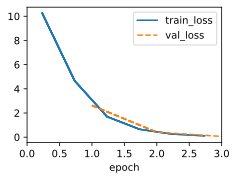

In [41]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [42]:
print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - model.b}')

error in estimating w: tensor([ 0.1313, -0.2382], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.2240], grad_fn=<RsubBackward1>)


我们不应该把精确恢复地面真实参数的能力视为理所当然。一般来说，对于深度模型来说，参数的唯一解决方案是不存在的，即使对于线性模型来说，只有在没有任何特征是线性依赖其他特征的情况下，才有可能精确恢复参数。然而，在机器学习中，我们往往不太关心恢复真正的基础参数，而更关心能导致高度精确预测的参数。

## **3.5. 线性回归的简明实施（Concise Implementation of Linear Regression）**

In [43]:
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

### **3.5.1. 定义模型（Defining the Model）**

对于标准操作，我们可以使用一个框架的预定义层，这使得我们可以专注于用于构建模型的层，而不是担心它们的实现。回顾一下单层网络的架构。该层被称为 **全连接（*fully connected*）**，因为它的**每个输入都是通过矩阵-向量乘法的方式连接到每个输出的**。

在 PyTorch 中，全连接层被定义在 `Linear` 和 `LazyLinear`（从1.8.0版本开始可用）类中。后者允许用户只指定输出维度，而前者则额外询问有多少个输入进入该层。指定输入形状是不方便的，这可能需要进行非简单的计算（比如在卷积层中）。因此，为了简单起见，我们将尽可能地使用这种 `LazyLinear`。

In [44]:
class LinearRegression(d2l.Module):
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

In [45]:
@d2l.add_to_class(LinearRegression)
def forward(self, X):
    """The linear regression model."""
    return self.net(X)

### **3.5.2. 定义损失函数（Defining the Loss Function）**

`MSELoss` 类计算的是 **平均平方误差（*mean squared error*）**（没有 $\frac{1}{2} $ 个因子）。默认情况下，`MSELoss` 返回实例的平均损失。

In [46]:
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

### **3.5.3. 定义优化算法（Defining the Optimization Algorithm）**

Minibatch SGD 是优化神经网络的标准工具，因此 `PyTorch` 在 `optim` 模块中支持它以及该算法的一些变体。当我们实例化一个 SGD 实例时，我们指定要优化的参数，这些参数可以通过 `self.parameters()` 从我们的模型中获得，以及我们的优化算法所要求的学习率（`self.lr`）。

In [47]:
@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

### **3.5.4. 训练（Training）**

通过深度学习框架的高级API来表达我们的模型需要更少的代码行。我们不需要单独分配参数，定义我们的损失函数，或实现迷你批的SGD。一旦我们开始处理更复杂的模型，高级别API的优势将大大增加。

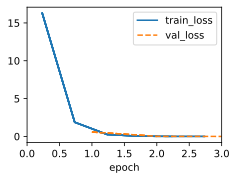

In [48]:
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [49]:
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

error in estimating w: tensor([ 0.0047, -0.0080])
error in estimating b: tensor([0.0070])


## **3.6. 泛化（Generalization）**

与基础分布相比，更接近我们的训练数据的现象被称为 **过拟合（*overfitting*）**，而对抗过拟合的技术通常被称为 **正则化方法（*regularization methods*）**。

### **3.6.1. 训练误差和泛化误差（Training Error and Generalization Error）**

我们需要区分 **训练误差（*training error*）**和 **泛化误差（*generalization error*）**。通俗来讲，前者指模型在**训练数据集上表现出的误差**，后者指模型在**任意一个测试数据样本上表现出的误差的期望**，并常常通过测试数据集上的误差来近似。

在机器学习里，我们通常假设训练数据集（训练题）和测试数据集（测试题）里的每一个样本都是从同一个概率分布中相互独立地生成的。基于该独立同分布假设，给定任意一个机器学习模型（含参数），它的训练误差的期望和泛化误差都是一样的。一般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现**优于或等于在测试数据集上的表**现。由于无法从训练误差估计泛化误差，**一味地降低训练误差并不意味着泛化误差一定会降低**。

**机器学习模型应关注降低泛化误差。**

### **3.6.2. 欠拟合或过拟合（Underfitting or Overfitting）**

接下来，我们将探究模型训练中经常出现的两类典型问题：一类是模型无法得到较低的训练误差，我们将这一现象称作 **欠拟合（*underfitting*）**；另一类是模型的训练误差远小于它在测试数据集上的误差，我们称该现象为 **过拟合（*overfitting*）**。在实践中，我们要尽可能同时应对欠拟合和过拟合。虽然有很多因素可能导致这两种拟合问题，在这里我们重点讨论两个因素：模型复杂度和训练数据集大小。

**3.6.2.1. 多项式曲线解释模型复杂度（Polynomial Curve Fitting）**

为了解释模型复杂度，我们以多项式函数拟合为例。给定一个由标量数据特征 $x$ 和对应的标量标签 $y$ 组成的训练数据集，多项式函数拟合的目标是找一个 $K$ 阶多项式函数

$$\hat{y} = \sum_{i=1}^{d}x^{i}w_{i}$$

来近似 $y$。在上式中，$w_{i}$ 是模型的权重参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数模型**参数更多**，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的**复杂度更高**。因此，高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型复杂度和误差之间的关系通常如下图所示。给定训练数据集，如果模型的**复杂度过低**，很容易出现**欠拟合**；如果模型**复杂度过高**，很容易出现**过拟合**。应对欠拟合和过拟合的一个办法是针对数据集选择合适复杂度的模型。

<center><img src="https://drive.google.com/uc?export=view&id=13yxQwoY4WVKBLNmfagB_RdAJQxVOeElz" width=375px /></center>


**3.6.2.2. 数据集大小（Dataset Size）**

影响欠拟合和过拟合的另一个重要因素是 **训练数据集的大小**。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，过拟合更容易发生。此外，泛化误差不会随训练数据集里样本数量增加而增大。因此，在计算资源允许的范围之内，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。

### **3.6.3. 模型选择（Model Selection）**

在机器学习中，通常需要评估若干候选模型的表现并从中选择模型。这一过程称为 **模型选择（*model selection*）**。为了得到有效的模型，我们通常要在模型选择上下一番功夫。

从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练数据集和测试数据集以外的数据来进行模型选择。这部分数据被称为 **验证数据集（*validation data set*）**，简称 **验证集（*validation set*）**。例如，我们可以从给定的训练集中随机选取一小部分作为验证集，而将剩余部分作为真正的训练集。

然而在实际应用中，由于数据不容易获取，测试数据极少只使用一次就丢弃。因此，实践中验证数据集和测试数据集的界限可能比较模糊。

**3.6.3.1. 交叉验证（Cross-Validation）**

由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是 **$K$折交叉验证（*$K$-fold cross-validation*）**。在 $K$折交叉验证中，我们把原始训练数据集分割成 $K$ 个不重合的子数据集，然后我们做 $K$ 次模型训练和验证。每一次，我们使用一个子数据集验证模型，并使用其他 $K−1$ 个子数据集来训练模型。在这 $K$ 次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这 $K$ 次训练误差和验证误差分别求平均。

## **3.7. 权重衰减（Weight Decay）**

在 3.6 中我们观察了过拟合现象，即模型的训练误差远小于它在测试集上的误差。虽然增大训练数据集可能会减轻过拟合，但是获取额外的训练数据往往代价高昂。本节介绍应对过拟合问题的常用方法：**权重衰减（*weight decay*）**。权重衰减不是直接操纵参数的数量，而是通过限制参数的取值来操作。

### **3.7.1. 范数和权重衰减（Norms and Weight Decay）**

权重衰减等价于 **$\ell_2$ 范数正则化（*regularization*）**。正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。我们先描述 $\ell_2$ 范数正则化，再解释它为何又称权重衰减。

$\ell_2$ 范数正则化在模型原损失函数基础上添加 $\ell_2$ 范数惩罚项，从而得到训练所需要最小化的函数。$\ell_2$ 范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积。以线性回归中的线性回归损失函数

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

为例，其中 $\mathbf{w}$ 是权重参数，$b$ 是偏差参数，样本 $i$ 的输入为 $x^{(i)}$，标签为 $y^{(i)}$，样本数为. $n$。带有 $\ell_2$ 范数惩罚项的新损失函数为

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2.$$

其中超参数 $\lambda>0$。当权重参数均为0时，惩罚项最小。当 $\lambda$ 较大时，惩罚项在损失函数中的比重较大，这通常会使学到的权重参数的元素较接近0。当 $\lambda$ 设为0时，惩罚项完全不起作用。有了 $\ell_2$ 范数惩罚项后，在小批量随机梯度下降中，我们将线性回归中权重 $\mathbf{w}$ 的迭代方式更改为

$$\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}$$

可见，$\ell_2$ 范数正则化令权重 $\mathbf{w}$ 先自乘小于1的数，再减去不含惩罚项的梯度。因此，$\ell_2$ 范数正则化又叫权重衰减。权重衰减通过惩罚绝对值较大的模型参数为需要学习的模型增加了限制，这可能对过拟合有效。实际场景中，我们有时也在惩罚项中添加偏差元素的平方和。


### **3.7.2. 高维线性回归实验（High-Dimensional Linear Regression）**

In [50]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

首先，我们生成一些数据:

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01^2).$$

在这个合成数据集中，我们的标签是由我们的输入的基本线性函数给出的，被均值为0、标准差为0.01的高斯噪声所破坏。为了说明问题，我们可以把问题的维度提高到 $d = 200$，并使用一个只有20个例子的小型训练集，从而使过拟合的影响变得明显。


In [51]:
class Data(d2l.DataModule):
    def __init__(self, num_train, num_val, num_inputs, batch_size):
        self.save_hyperparameters()
        n = num_train + num_val
        self.X = torch.randn(n, num_inputs)
        noise = torch.randn(n, 1) * 0.01
        w, b = torch.ones((num_inputs, 1)) * 0.01, 0.05
        self.y = torch.matmul(self.X, w) + b + noise

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader([self.X, self.y], train, i)

### **3.7.3. 从零开始实现（Implementation from Scratch）**

In [52]:
def l2_penalty(w):
    return (w ** 2).sum() / 2

In [53]:
class WeightDecayScratch(d2l.LinearRegressionScratch):
    def __init__(self, num_inputs, lambd, lr, sigma=0.01):
        super().__init__(num_inputs, lr, sigma)
        self.save_hyperparameters()

    def loss(self, y_hat, y):
        return (super().loss(y_hat, y) +
                self.lambd * l2_penalty(self.w))

In [54]:
data = Data(num_train=20, num_val=100, num_inputs=200, batch_size=5)
trainer = d2l.Trainer(max_epochs=10)

def train_scratch(lambd):
    model = WeightDecayScratch(num_inputs=200, lambd=lambd, lr=0.01)
    model.board.yscale='log'
    trainer.fit(model, data)
    print('L2 norm of w:', float(l2_penalty(model.w)))

我们现在用 `lambd = 0` 运行这段代码，禁用权重衰减。请注意，我们严重过拟合，降低了训练误差，但没有降低验证误差--这是一个教科书式的过拟合案例。

L2 norm of w: 0.009607909247279167


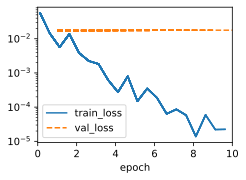

In [55]:
train_scratch(0)

下面，我们用大量的权重衰减来运行。请注意，训练误差增加了，但验证误差却减少了。这正是我们期待的正则化的效果。

L2 norm of w: 0.0016761997248977423


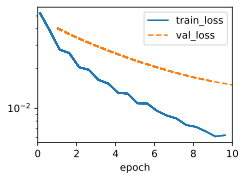

In [56]:
train_scratch(3)

### **3.7.4. 简明的实现（Concise Implementation）**

在下面的代码中，我们在实例化优化器时直接通过 `weight_decay` 指定权重衰减超参数。默认情况下，PyTorch 会同时对权重和偏差进行衰减，但我们可以根据不同的策略配置优化器来处理不同的参数。在这里，我们只为权重（`net.weight` 参数）设置 `weight_decay`，因此偏差 （`net.bias` 参数）将不会衰减。

In [57]:
class WeightDecay(d2l.LinearRegression):
    def __init__(self, wd, lr):
        super().__init__(lr)
        self.save_hyperparameters()
        self.wd = wd

    def configure_optimizers(self):
        return torch.optim.SGD([
            {'params': self.net.weight, 'weight_decay': self.wd},
            {'params': self.net.bias}], lr=self.lr)

L2 norm of w: 0.013066286221146584


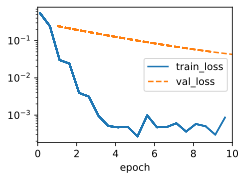

In [58]:
model = WeightDecay(wd=3, lr=0.01)
model.board.yscale='log'
trainer.fit(model, data)

print('L2 norm of w:', float(l2_penalty(model.get_w_b()[0])))

In [61]:
%%shell
jupyter nbconvert --to html 03_D2L_Linear_Neural_Networks_for_Regression.ipynb

[NbConvertApp] Converting notebook 03_D2L_Linear_Neural_Networks_for_Regression.ipynb to html
[NbConvertApp] Writing 503279 bytes to 03_D2L_Linear_Neural_Networks_for_Regression.html
